In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
# definition of function
def y_diff(t,y):
    return -0.5*tanh(t)*y

# 1) Explicit method
def EE(n, h,yn, func):
    return yn+h*func(n*h,yn)

# 2) Implicit method
def IE(n, h, yn):
    return 1/(1+0.5*h*tanh((n+1)*h))*yn

# 3) TR method
def TR(n,h,yn):
    return (1-1/4*tanh(n*h))/(1+1/4*tanh((n+1)*h))*yn

# 4) RK2
def RK2(n,h,yn,func):
    prd = yn+h/2*func(yn,n*h)
    return yn+h*func(prd,0.5*h*(2*n+1))

In [28]:
# (1), (2)
y_init = 1
all_y_EEs = []
h_s = [0.5, 3.9, 5] # 0.5, 3.9, 5
all_t = []
for i in range(0,len(h_s)):
    y_EE = [y_init]
    t = [0]
    h = h_s[i]
    N = floor(30/h)
    for n in range(0,N): # n = 0,1,2,...,N-1
        tn_post = (n+1)*h
        t.append(tn_post)

        # 1) EE
        yn = y_EE[n]
        yn_post = EE(n,h,yn,y_diff)
        y_EE.append(yn_post)
    all_t.append(t)
    all_y_EEs.append(y_EE)

In [33]:
len(all_t[2])

7

In [34]:
len(all_y_EEs[2])

7

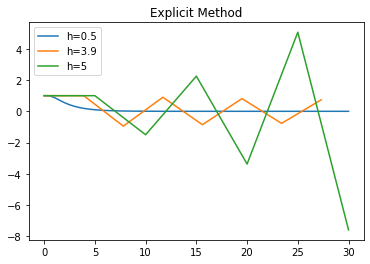

In [36]:
fig, ax = plt.subplots()
plt.title('Explicit Method')
ax.plot(all_t[0],all_y_EEs[0], label='h=0.5')
ax.plot(all_t[1],all_y_EEs[1], label='h=3.9')
ax.plot(all_t[2],all_y_EEs[2], label='h=5')
ax.legend()
plt.show()

### Integral

In [2]:
# from sympy import *
# init_printing(use_unicode=False, wrap_line=False)

import numpy as np


In [4]:
# # symbolic Integration
# symVar_t = symbols('t')
# symFun_f = sqrt(exp(-sqrt(t[i]))*(exp(t[i])+exp(-t[i])))
# # integrate(symFun_f,(symVar_t)) # can't calculate

In [24]:
h

8.0

In [58]:
# Numerical Integration
def funcA(t):
    return 1/np.sqrt((np.exp(t)+np.exp(-t)))

def funcB(t):
    return np.sqrt(np.exp(-np.sqrt(t))*(np.exp(t)+np.exp(-t)))

t_start = 0
t_end = 30
N = 2400 # number of intervals / number of data: N+1
h = (t_end-t_start)/N # step size

t = [t_start]
y = [1]

for n in range(0,N+1): # n = 0,1,2,..., N
    t_now = t[n]
    t_post = t_now+h

    # y(tn): even number일 때만  계산하기, integral using Simpson's rule
    # n = 2,4,6,...,N 
    if (n != 0) and (np.mod(n,2)==0):
        sum_B = 0
        for i in range(0,len(t)):
            # t0
            if i == 0: 
                sum_B += funcB(t[0])
            # tn
            elif i == len(t)-1: 
                sum_B += funcB(t[len(t)-1])
            # odd: n = 1,3,..., N-1
            elif np.mod(i,2)==1: 
                sum_B += 4*funcB(t[i])
            # even: n = 2,4,..., N-2
            elif np.mod(i,2)==0:
                sum_B += 2*funcB(t[i])
        # y(tn) = A(tn)*(h/3 + B(t0) + 4*B(t1) + 2*B(t2) +...2*B(tn-2) + 4*B(tn-1) + B(tn) + sqrt(2)) 
        # (단, n = 2,4,6,...,N)
        A = funcA(t_now)
        sol_ = A*(sum_B*h/3 + np.sqrt(2))
        print(t_now,sol_)
        
    # tn: n = 0,1,2,...,N
    if n !=N:
        t.append(t_post) 


0.025 1.0236184295470945
0.05 1.0458374846773744
0.075 1.0670802923689124
0.09999999999999999 1.0874705044836765
0.12499999999999999 1.1070756444174146
0.15 1.1259389333093972
0.17500000000000002 1.1440907122305655
0.20000000000000004 1.1615537423019775
0.22500000000000006 1.1783460496986302
0.25000000000000006 1.1944826051428121
0.2750000000000001 1.2099763832216637
0.3000000000000001 1.2248390628985664
0.3250000000000001 1.23908150657095
0.35000000000000014 1.2527140951955937
0.37500000000000017 1.2657469658284077
0.4000000000000002 1.278190180651862
0.4250000000000002 1.2900538464950353
0.45000000000000023 1.3013481977277392
0.47500000000000026 1.3120836515468195
0.5000000000000002 1.3222708421554348
0.5250000000000001 1.331920638647375
0.55 1.3410441502447166
0.575 1.3496527217143806
0.5999999999999999 1.357757921193106
0.6249999999999998 1.3653715222080456
0.6499999999999997 1.372505481344229
0.6749999999999996 1.3791719127491013
0.6999999999999995 1.3853830604571582
0.72499999999

8.925000000000027 0.5634966142271899
8.950000000000026 0.5620692698544714
8.975000000000025 0.5606480265808377
9.000000000000023 0.5592328490463586
9.025000000000022 0.5578237021114154
9.05000000000002 0.5564205508556554
9.075000000000019 0.5550233605769443
9.100000000000017 0.5536320967903147
9.125000000000016 0.5522467252269075
9.150000000000015 0.5508672118329145
9.175000000000013 0.5494935227685133
9.200000000000012 0.5481256244068021
9.22500000000001 0.5467634833327297
9.250000000000009 0.5454070663420242
9.275000000000007 0.5440563404401187
9.300000000000006 0.5427112728410756
9.325000000000005 0.5413718309665075
9.350000000000003 0.5400379824444982
9.375000000000002 0.5387096951085202
9.4 0.5373869369963534
9.424999999999999 0.5360696763490007
9.449999999999998 0.5347578816096038
9.474999999999996 0.5334515214223573
9.499999999999995 0.5321505646314227
9.524999999999993 0.5308549802798442
9.549999999999992 0.5295647376084601
9.57499999999999 0.5282798060548173
9.599999999999989 

15.04999999999968 0.3356480986046629
15.074999999999678 0.3350469812297508
15.099999999999676 0.33444759158840504
15.124999999999675 0.3338499221916106
15.149999999999674 0.33325396559393106
15.174999999999672 0.3326597143932069
15.19999999999967 0.33206716123025654
15.22499999999967 0.3314762987885794
15.249999999999668 0.33088711979406094
15.274999999999666 0.3302996170146807
15.299999999999665 0.3297137832602216
15.324999999999664 0.32912961138198193
15.349999999999662 0.32854709427248924
15.37499999999966 0.32796622486521626
15.39999999999966 0.3273869961342995
15.424999999999658 0.32680940109425904
15.449999999999656 0.3262334327997214
15.474999999999655 0.32565908434514357
15.499999999999654 0.3250863488645396
15.524999999999652 0.32451521953120915
15.54999999999965 0.3239456895574681
15.57499999999965 0.32337775219438086
15.599999999999648 0.32281140073149495
15.624999999999647 0.3222466284965775
15.649999999999645 0.3216834288553536
15.674999999999644 0.3211217952112469
15.6999

20.84999999999935 0.23097349200750247
20.87499999999935 0.23063590642378656
20.89999999999935 0.23029905367192502
20.924999999999347 0.22996293144554045
20.949999999999346 0.2296275374482713
20.974999999999344 0.22929286939371582
20.999999999999343 0.22895892500537635
21.02499999999934 0.2286257020166037
21.04999999999934 0.22829319817054203
21.07499999999934 0.22796141122007502
21.099999999999337 0.22763033892777018
21.124999999999336 0.22729997906582608
21.149999999999334 0.22697032941601814
21.174999999999333 0.22664138776964576
21.19999999999933 0.22631315192747908
21.22499999999933 0.22598561969970676
21.24999999999933 0.225658788905884
21.274999999999327 0.22533265737488004
21.299999999999326 0.22500722294482747
21.324999999999324 0.2246824834630705
21.349999999999323 0.22435843678611464
21.37499999999932 0.22403508077957587
21.39999999999932 0.22371241331813074
21.42499999999932 0.22339043228546673
21.449999999999317 0.22306913557423236
21.474999999999316 0.22274852108598847
21.

26.449999999999033 0.1702153141784161
26.47499999999903 0.1699983811373514
26.49999999999903 0.16978183940697622
26.52499999999903 0.1695656880074594
26.549999999999027 0.16934992596226586
26.574999999999026 0.16913455229814245
26.599999999999024 0.16891956604510325
26.624999999999023 0.16870496623641573
26.64999999999902 0.16849075190858653
26.67499999999902 0.16827692210134726
26.69999999999902 0.16806347585764075
26.724999999999017 0.16785041222360716
26.749999999999016 0.16763773024856993
26.774999999999014 0.16742542898502236
26.799999999999013 0.1672135074886137
26.82499999999901 0.16700196481813562
26.84999999999901 0.16679080003550872
26.87499999999901 0.16658001220576918
26.899999999999007 0.1663696003970551
26.924999999999006 0.16615956368059345
26.949999999999005 0.16594990113068678
26.974999999999003 0.16574061182469998
26.999999999999 0.16553169484304728
27.024999999999 0.16532314926917918
27.049999999999 0.16511497418956944
27.074999999998997 0.16490716869370237
27.099999

In [59]:
len(y)

1201

In [60]:
len(t)

2401

In [68]:
t_idx = [2*i for i in range(0,int((len(t)+1)/2))]
t_use = np.array(t)[t_idx]

[(0, 1.6)]

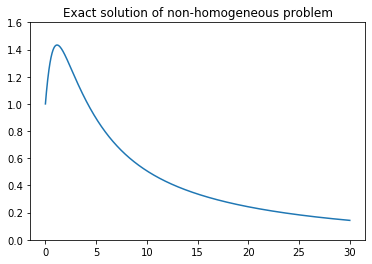

In [75]:
fig,ax = plt.subplots()
plt.title('Exact solution of non-homogeneous problem')
ax.plot(t_use,y)
ax.set(ylim=(0, 1.6))
# ax.grid()
# ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

### HW3-2-(3)

In [17]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [22]:
# (3), (4)
# definition of function
def y_diff(t,y):
    return -0.5*tanh(t)*y+exp(-0.5*sqrt(t))

# 1) Explicit method
def EE(n, h,yn, func):
    return yn+h*func(n*h,yn)

# 2) Implicit method
def IE(n, h, yn):
    return 1/(1+0.5*h*tanh((n+1)*h))*yn

# 3) TR method
def TR(n,h,yn):
    return (1-1/4*tanh(n*h))/(1+1/4*tanh((n+1)*h))*yn

# 4) RK2
def RK2(n,h,yn,func):
    prd = yn+h/2*func(yn,n*h)
    return yn+h*func(prd,0.5*h*(2*n+1))

In [23]:
y_init = 1
all_y_EEs = []
h_s = [0.5, 3.9, 5] # 0.5, 3.9, 5
all_t = []
for i in range(0,len(h_s)):
    y_EE = [y_init]
    t = [0]
    h = h_s[i]
    N = int(np.floor(30/h))
    for n in range(0,N): # n = 0,1,2,...,N-1
        tn_post = (n+1)*h
        t.append(tn_post)

        # 1) EE
        yn = y_EE[n]
        yn_post = EE(n,h,yn,y_diff)
        y_EE.append(yn_post)
    all_t.append(t)
    all_y_EEs.append(y_EE)

In [24]:
print("{}, {}".format(len(all_t[2]),len(all_y_EEs[2])))

7, 7


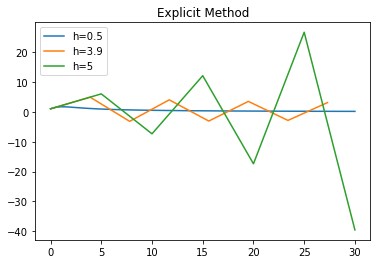

In [25]:
fig, ax = plt.subplots()
plt.title('Explicit Method')
ax.plot(all_t[0],all_y_EEs[0], label='h=0.5')
ax.plot(all_t[1],all_y_EEs[1], label='h=3.9')
ax.plot(all_t[2],all_y_EEs[2], label='h=5')
ax.legend()
plt.show()